# How to scrap a website (no pain - no gain)

Основные библиотеки (названия кликабельны - рекомендую почитать)

- **[`requests`](http://docs.python-requests.org/en/master/#)** 

Прекрасная библиотека для создания собственных запросов к серверам, которую мы будем использовать для получения сырого, необработанного, страшного и путанного HTML кода страницы 


- **[`bs4`](https://www.crummy.com/software/BeautifulSoup/)**, a.k.a **BeautifulSoup**

Красивый суп. Эта совершенно волшебная библиотека, которая из сырого и необработанного HTML (или XML) кода страницы выдаст вам структурированный массив данных, по которому очень удобно искать необходимые теги, классы, атрибуты, тексты и прочие элементы веб страниц

In [2]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import time
import sys

from tqdm import tqdm_notebook

### Так выглядит наша главная ссылка, по которой мы будем в дальнейшем гулять, добавляя новые значения для страницы

In [3]:
main_url = 'https://republic.ru/?page='

In [4]:
page = 1

Если склеить два кусочка - мы получим наш url!

In [5]:
main_url+str(page)

'https://republic.ru/?page=1'

Благословенный 200 ответ - соединение установлено и данные получены, всё чудесно!

In [6]:
requests.get(main_url+str(page))

<Response [200]>

Создадим переменную, которая будет держать HTML код нашей полученной страницы

In [7]:
news_page = requests.get(main_url+str(page))
news_page = news_page.content

In [88]:
# news_page

In [9]:
news_page = BeautifulSoup(news_page, 'lxml')

### Стало намного лучше, не правда ли?

In [89]:
# news_page

### Зато теперь зная "адрес" элемента на странице мы сможем находить его в этой куче добра

In [11]:
news_page = news_page.find('div', attrs={'class':'materials-list'})

In [12]:
print(news_page.find('h2', attrs = {'class':"card__title article-feature-title"}).text.strip())

Самый русский немец. Чем Россия обязана прапрадеду новой главы Еврокомиссии


In [13]:
for newshead in news_page.findAll('h2', attrs = {'class':"card__title article-feature-title"}):
    print(newshead.text.strip())

Самый русский немец. Чем Россия обязана прапрадеду новой главы Еврокомиссии
Дизайнер из деревни. Как Симон Жакмюс за 10 лет создал бренд, популярный во всем мире
Сибирь и Дальний Восток в огне. Что нужно знать о лесных пожарах, охвативших Россию
«С приходом немцев перед каждым жителем Смоленска вставал вопрос: что делать?»
Бойтесь своих желаний. Что делать Москве, если Киев начнет выполнять Минские соглашения?
Китайский связной.  Почему Ли Кай Фу прочат в вожди революции в искусственном интеллекте
Ася Казанцева: «Мы можем влиять на наш мозг, повышая вероятность выбора тех или иных решений»
«Я чувствую контакт». Как скептики разоблачают известных ясновидящих
Министр в мраморной ванне. Как Минпромторг отреагировал на расследование Transparency International
250 слуг народа. Партия Зеленского одерживает безоговорочную победу на парламентских выборах
Хаос и паника. Что происходит с Facebook после недавних крупных скандалов?
«Сегодня либерализм выступает в роли козла отпущения»
«Я непременн

## Итак, мы достали заголовки! Но на этом мы точно не остановимся - идём вглубь страницы

In [14]:
news_link = news_page.find('a', attrs= {'class':'card__link'})

In [15]:
news_link

<a class="card__link" href="/posts/94318"></a>

In [16]:
news_link.get('href')

'/posts/94318'

In [17]:
news_link = news_link.get('href')

### А вот и недостающая часть для нашей ссылки на страницу
Теперь мы сможем перейти и на нее

In [18]:
'https://republic.ru' + news_link

'https://republic.ru/posts/94318'

In [90]:
# requests.get('https://republic.ru' + news_link).content

In [20]:
sub_page = requests.get('https://republic.ru' + news_link).content
sub_page = BeautifulSoup(sub_page, 'lxml')

In [21]:
def get_subpage(news_link):
    sub_page = requests.get('https://republic.ru' + news_link).content
    sub_page = BeautifulSoup(sub_page, 'lxml')
    return sub_page

In [22]:
sub_page = get_subpage(news_link)

# Дата публикации

In [23]:
publication_date = sub_page.find('div', attrs={'class': 'post-meta post-header__meta'})
print(publication_date)

<div class="post-meta post-header__meta">
<a class="post-meta__magazine magazine" href="/mags/money">Деньги</a>
<a class="post-meta__item post-meta__tag" href="/tags/64">
            Бизнес
        </a>
<span class="post-meta__item post-meta__published-at">
<span>29 июля</span>
</span>
</div>


In [24]:
publication_date = publication_date.find('span', attrs={'class': 'post-meta__item post-meta__published-at'})
print(publication_date)

<span class="post-meta__item post-meta__published-at">
<span>29 июля</span>
</span>


In [25]:
publication_date = publication_date.text.strip()
print(publication_date)

29 июля


In [26]:
def get_publication_date(sub_page):
    publication_date = sub_page.find('div', attrs={'class': 'post-meta post-header__meta'})
    publication_date = publication_date.find('span', attrs={'class': 'post-meta__item post-meta__published-at'})
    publication_date = publication_date.text.strip()
    return publication_date

In [27]:
get_publication_date(sub_page)

'29 июля'

# Урезанный текст публикации

In [33]:
publication_text = sub_page.find("div", attrs={'class', 'post-body'}).findAll('p')
publication_text

[<p class="post-heroimage__caption">Кренгольмская мануфактура, здание Йоальской фабрики</p>,
 <p class="post-heroimage__credit">Фото: Narva69</p>,
 <p class="MsoPlainText">За приключениями и деньгами европейцы в целом и немцы в частности отправлялись не только на запад, через Атлантику, но и на восток. Россия всегда манила энергичных и предприимчивых иностранцев возможностями, просторами и природными богатствами. «Варяги» оставили заметный след в истории страны. В том числе и в экономике.</p>,
 <p class="MsoPlainText">Наиболее представительным был «десант» из Германии. Один из русских немцев, уроженец Бремена Людвиг Иоганн Кноп (1821–1894) считался одним из самых богатых людей России во второй половине XIX века. Немецкий экономист Геро фон Шульце-Геверниц <a href="https://books.google.ru/books?id=Zo-xAwAAQBAJ&amp;pg=PA18&amp;lpg=PA18&amp;dq=johann+ludwig+knoop&amp;source=bl&amp;ots=1K85V21TUI&amp;sig=ACfU3U1-oOvtcqR7Rouq6L7HTJhUpqWKqw&amp;hl=en&amp;sa=X&amp;ved=2ahUKEwikxJje1cXjAhUj_So

In [34]:
publication_text = [raw_text.text for raw_text in publication_text]
publication_text

['Кренгольмская мануфактура, здание Йоальской фабрики',
 'Фото: Narva69',
 'За приключениями и деньгами европейцы в целом и немцы в частности отправлялись не только на запад, через Атлантику, но и на восток. Россия всегда манила энергичных и предприимчивых иностранцев возможностями, просторами и природными богатствами. «Варяги» оставили заметный след в истории страны. В том числе и в экономике.',
 'Наиболее представительным был «десант» из Германии. Один из русских немцев, уроженец Бремена Людвиг Иоганн Кноп (1821–1894) считался одним из самых богатых людей России во второй половине XIX века. Немецкий экономист Геро фон Шульце-Геверниц считал Кнопа величайшим российским промышленником и одним из крупнейших европейских бизнесменов второй половины XIX века и сравнивал его с Джоном Рокфеллером и Ричардом Аркрайтом, отцом британской текстильной промышленности. Свою империю Людвиг Кноп построил на малоизвестных в середине XIX века в России китах: посредничестве, инвестициях и техническом пе

In [40]:
publication_text = ". ".join(publication_text)
publication_text

'Кренгольмская мануфактура, здание Йоальской фабрики. Фото: Narva69. За приключениями и деньгами европейцы в целом и немцы в частности отправлялись не только на запад, через Атлантику, но и на восток. Россия всегда манила энергичных и предприимчивых иностранцев возможностями, просторами и природными богатствами. «Варяги» оставили заметный след в истории страны. В том числе и в экономике.. Наиболее представительным был «десант» из Германии. Один из русских немцев, уроженец Бремена Людвиг Иоганн Кноп (1821–1894) считался одним из самых богатых людей России во второй половине XIX века. Немецкий экономист Геро фон Шульце-Геверниц считал Кнопа величайшим российским промышленником и одним из крупнейших европейских бизнесменов второй половины XIX века и сравнивал его с Джоном Рокфеллером и Ричардом Аркрайтом, отцом британской текстильной промышленности. Свою империю Людвиг Кноп построил на малоизвестных в середине XIX века в России китах: посредничестве, инвестициях и техническом перевооружен

In [41]:
def get_publication_text(sub_page):
    publication_text = sub_page.find("div", attrs={'class', 'post-body'}).findAll('p')
    publication_text = [raw_text.text for raw_text in publication_text]
    publication_text = ". ".join(publication_text)
    return publication_text

In [42]:
get_publication_text(sub_page)

'Кренгольмская мануфактура, здание Йоальской фабрики. Фото: Narva69. За приключениями и деньгами европейцы в целом и немцы в частности отправлялись не только на запад, через Атлантику, но и на восток. Россия всегда манила энергичных и предприимчивых иностранцев возможностями, просторами и природными богатствами. «Варяги» оставили заметный след в истории страны. В том числе и в экономике.. Наиболее представительным был «десант» из Германии. Один из русских немцев, уроженец Бремена Людвиг Иоганн Кноп (1821–1894) считался одним из самых богатых людей России во второй половине XIX века. Немецкий экономист Геро фон Шульце-Геверниц считал Кнопа величайшим российским промышленником и одним из крупнейших европейских бизнесменов второй половины XIX века и сравнивал его с Джоном Рокфеллером и Ричардом Аркрайтом, отцом британской текстильной промышленности. Свою империю Людвиг Кноп построил на малоизвестных в середине XIX века в России китах: посредничестве, инвестициях и техническом перевооружен

# Лайки/дизлайки

In [43]:
likes_dislikes = sub_page.find('div', attrs={'class':'post-rating__buttons'}).findAll('span')
likes_dislikes

[<span class="post-rating__counter post-rating__counter--like">44</span>,
 <span class="post-rating__counter post-rating__counter--dislike">0</span>]

In [44]:
likes, dislikes = int(likes_dislikes[0].text), int(likes_dislikes[1].text)
likes, dislikes

(44, 0)

In [45]:
def get_likes_dislikes(sub_page):
    likes_dislikes = sub_page.find('div', attrs={'class':'post-rating__buttons'}).findAll('span')
    likes, dislikes = int(likes_dislikes[0].text), int(likes_dislikes[1].text)
    return likes, dislikes

In [46]:
get_likes_dislikes(sub_page)

(44, 0)

# Для удобства - достанем заголовок из страницы

In [47]:
sub_page.find('h1').text.strip()

'Самый русский немец. Чем Россия обязана прапрадеду новой главы Еврокомиссии'

In [48]:
def get_publication_header(sub_page):
    return sub_page.find('h1').text.strip()

In [49]:
get_publication_header(sub_page)

'Самый русский немец. Чем Россия обязана прапрадеду новой главы Еврокомиссии'

# Попробуем соединить все вместе

In [50]:
news_link

'/posts/94318'

In [51]:
sub_page = get_subpage(news_link)

date = get_publication_date(sub_page)
text = get_publication_text(sub_page)
likes, dislikes = get_likes_dislikes(sub_page)
header = get_publication_header(sub_page)

sub_page_data = {'header':header, 'date':date, 'text':text, 'likes':likes, 'dislikes':dislikes}

In [52]:
sub_page_data

{'header': 'Самый русский немец. Чем Россия обязана прапрадеду новой главы Еврокомиссии',
 'date': '29 июля',
 'text': 'Кренгольмская мануфактура, здание Йоальской фабрики. Фото: Narva69. За приключениями и деньгами европейцы в целом и немцы в частности отправлялись не только на запад, через Атлантику, но и на восток. Россия всегда манила энергичных и предприимчивых иностранцев возможностями, просторами и природными богатствами. «Варяги» оставили заметный след в истории страны. В том числе и в экономике.. Наиболее представительным был «десант» из Германии. Один из русских немцев, уроженец Бремена Людвиг Иоганн Кноп (1821–1894) считался одним из самых богатых людей России во второй половине XIX века. Немецкий экономист Геро фон Шульце-Геверниц считал Кнопа величайшим российским промышленником и одним из крупнейших европейских бизнесменов второй половины XIX века и сравнивал его с Джоном Рокфеллером и Ричардом Аркрайтом, отцом британской текстильной промышленности. Свою империю Людвиг Кн

In [53]:
def get_sub_page_data(news_link):
    sub_page = get_subpage(news_link)
    date = get_publication_date(sub_page)
    text = get_publication_text(sub_page)
    likes, dislikes = get_likes_dislikes(sub_page)
    header = get_publication_header(sub_page)
    sub_page_data = {'header':header, 'date':date, 'text':text, 'likes':likes, 'dislikes':dislikes}
    return sub_page_data

ура!

Теперь соберем все ссылки с одной страницы

In [56]:
def get_news_page_links(page_number):
    news_page = requests.get(main_url+str(page_number))
    news_page = news_page.content
    news_page = BeautifulSoup(news_page, 'lxml')
    
    news_page = news_page.find('div', attrs={'class':'materials-list'})
    news_links = news_page.findAll('a', attrs= {'class':'card__link'})
    news_links = list(set(news_links))
    news_links = [link.get('href') for link in news_links]
    
    return news_links

In [57]:
news_links = get_news_page_links(0)

In [58]:
news_links

['/posts/92481',
 '/posts/94125',
 '/posts/93716',
 '/posts/94317',
 '/posts/94106',
 '/posts/93563',
 '/posts/94197',
 '/posts/93985',
 '/posts/94047',
 '/posts/94218',
 '/posts/94253',
 '/posts/93974',
 '/posts/93934',
 '/posts/94318',
 '/posts/94199',
 '/posts/93172',
 '/posts/93708',
 '/posts/94184',
 '/posts/94320']

# Пошли гулять по страничкам!

In [60]:
for news_link in news_links:
    sub_page_data = get_sub_page_data(news_link)
    print(sub_page_data['header'])
    print(sub_page_data['date'])
    print(f"Likes: {sub_page_data['likes']}, Dislikes: {sub_page_data['dislikes']}")
    print('====================')
    time.sleep(0.2)

Конец согласия. Откуда в обществе берется поляризация?
16 ноября 2018
Likes: 78, Dislikes: 4
Бойтесь своих желаний. Что делать Москве, если Киев начнет выполнять Минские соглашения?
8 июля
Likes: 115, Dislikes: 3
Китайский связной.  Почему Ли Кай Фу прочат в вожди революции в искусственном интеллекте
16 мая
Likes: 85, Dislikes: 1
Дизайнер из деревни. Как Симон Жакмюс за 10 лет создал бренд, популярный во всем мире
09:00
Likes: 9, Dislikes: 0
«Сегодня либерализм выступает в роли козла отпущения»
6 июля
Likes: 66, Dislikes: 8
Хаос и паника. Что происходит с Facebook после недавних крупных скандалов?
19 апреля
Likes: 32, Dislikes: 18
Слишком активный гражданин. Как независимых кандидатов не пускают на выборы в городской парламент
16 июля
Likes: 74, Dislikes: 0
Ася Казанцева: «Мы можем влиять на наш мозг, повышая вероятность выбора тех или иных решений»
20 июня
Likes: 82, Dislikes: 2
Министр в мраморной ванне. Как Минпромторг отреагировал на расследование Transparency International
26 июня

Если углубимся в историю на 100 страниц, попадем примерно в февраль этого года, если на 200 - уже в октябрь 2017. Попробуем собрать немного новостей:

In [61]:
NEWS = pd.DataFrame(columns=['header', 'date', 'text', 'likes', 'dislikes'])

In [62]:
total_pages = 3

In [63]:
for page_number in tqdm_notebook(range(total_pages)):
    # get links
    news_links = get_news_page_links(page_number)

    for news_link in tqdm_notebook(news_links, leave=False):
        try:
            sub_page_data = get_sub_page_data(news_link)
            NEWS = NEWS.append(sub_page_data, ignore_index=True)
            time.sleep(0.2)
        except:
            pass

In [64]:
NEWS.head()

,header,date,text,likes,dislikes
0,Конец согласия. Откуда в обществе берется поля...,16 ноября 2018,Протест против реформ финансового сектора. Афи...,78,4
1,"Бойтесь своих желаний. Что делать Москве, если...",8 июля,Президент Украины Владимир Зеленский (справа) ...,115,3
2,Китайский связной. Почему Ли Кай Фу прочат в ...,16 мая,Ли Кай Фу. Фото: David Gray / Reuters. Пока ми...,85,1
3,Дизайнер из деревни. Как Симон Жакмюс за 10 ле...,09:00,Модели представляют творения дизайнера Симона ...,9,0
4,«Сегодня либерализм выступает в роли козла отп...,6 июля,Групповое фото участников саммита в Осаке. Фот...,66,8


![](http://i0.kym-cdn.com/entries/icons/facebook/000/006/077/so_good.jpg)

In [75]:
NEWS = NEWS.drop_duplicates().reset_index(drop=True)

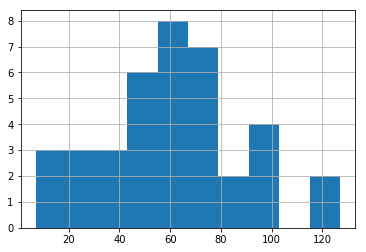

In [76]:
NEWS.likes.astype(int).hist();

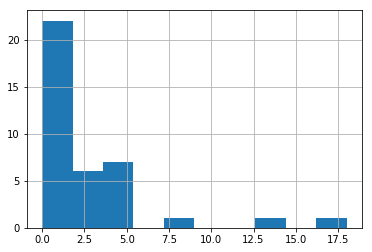

In [77]:
NEWS.dislikes.astype(int).hist();

In [81]:
NEWS[NEWS.likes == max(NEWS.likes)]

,header,date,text,likes,dislikes
8,Министр в мраморной ванне. Как Минпромторг отр...,26 июня,Денис Мантуров. Сергей Фадеичев / ТАСС. Пока А...,127,1


In [82]:
NEWS[NEWS.dislikes == max(NEWS.dislikes)]

,header,date,text,likes,dislikes
5,Хаос и паника. Что происходит с Facebook после...,19 апреля,Марк Цукерберг. Фото: Charles Platiau / Reuter...,32,18


In [86]:
NEWS.loc[8].header

'Министр в\xa0мраморной ванне. Как Минпромторг отреагировал на\xa0расследование Transparency International'

In [87]:
NEWS.loc[5].header

'Хаос и\xa0паника. Что происходит с\xa0Facebook после недавних крупных скандалов?'